# 5 Network analysis

In [207]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Basic concepts of network

- A __network__ is frequently used interchangeably with a __graph__, but it typically highlights real-world applications and is commonly associated with social relationships (social networks), and built environments  (road networks).

- A __graph__ ($G$) is a mathematical structure used to model pairwise relations between objects. It consists of a set of __vertices (nodes)__ and a set of __edges (links)__ that connect pairs of vertices.


__Graph Type__


 Graph Type       | Description          | NetworkX Class    | 
--------------------------|-----------------------------------------------------------------  |----------------------------------
 Undirected Graph         | A graph where edges have no direction.   | __Graph__
 Directed Graph           | A graph where edges have a direction, indicated by an arrow.  |__DiGraph__
 Multi-(undirected) Graph |An undirected graph with parallel edges. |__MultiGraph__
 Multi-directed Graph     | A directed graph with  parallel edges.  |__MultiDiGraph__

Note: All types of graphs can have self-loops.

## 5.2  Measurements for nodes and edges

In [208]:
# Create an empty undirected graph
G = nx.Graph()

In [209]:
# Add edge with weight
G.add_edge(1, 2, weight=30)
G.add_edge(1, 3, weight=5)
G.add_edge(2, 3, weight=22)
G.add_edge(2, 4, weight=2)
G.add_edge(3, 4, weight=37)

In [210]:
# Print edge infos
print(G.edges(data=True))

[(1, 2, {'weight': 30}), (1, 3, {'weight': 5}), (2, 3, {'weight': 22}), (2, 4, {'weight': 2}), (3, 4, {'weight': 37})]


In [211]:
# Print node infos, the {} represents the node attributes for each node, e.g, you can input {'attribute_name': 'value'}
print(G.nodes(data=True))

[(1, {}), (2, {}), (3, {}), (4, {})]


In [212]:
# Print weight info
weights = nx.get_edge_attributes(G, 'weight')
weights

{(1, 2): 30, (1, 3): 5, (2, 3): 22, (2, 4): 2, (3, 4): 37}

{(1, 2): Text(0.5240634079093816, 0.47066876979592914, '30'),
 (1, 3): Text(0.4762716027523263, 0.340531390307549, '5'),
 (2, 3): Text(0.47877655910456957, 0.19983703254149957, '22'),
 (2, 4): Text(0.4086578125731257, 0.34776798775146517, '2'),
 (3, 4): Text(0.3608663441084365, 0.2176337870583286, '37')}

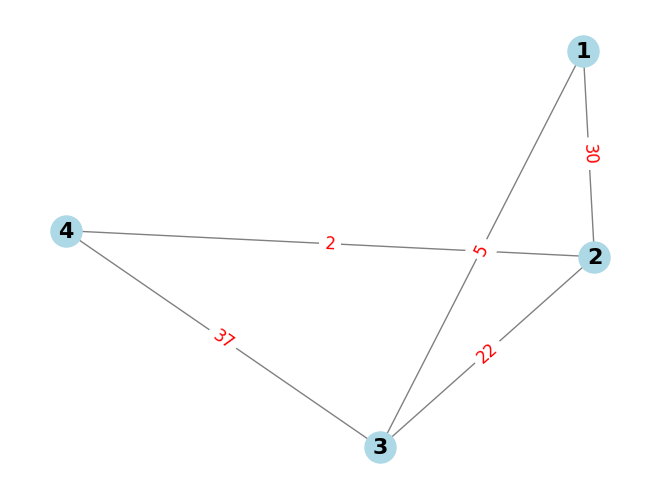

In [213]:
# Network draw 
pos = nx.random_layout(G)

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)


### 5.2.1 [Degree centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in $G$.

In [214]:
# networkx
nx.degree_centrality(G)

{1: 0.6666666666666666, 2: 1.0, 3: 1.0, 4: 0.6666666666666666}

### 5.2.2 [Closeness centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)

- Closeness centrality of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.
- $G =(U,V)$.

$C(v) = \frac{n-1}{\sum_{v =1}^{n-1} d(v, u)}$

- where $d(v, u)$ is the shortest-path distance between v and u, and n-1 is the number of nodes reachable from $u$.

__Shortest path and distance__

- 1->2 : 1,3,2 (5+22 = 27)

- 1->3: 1,3 (5)

- 1->4: 1,3,2,4 (5+22+2=29)

- 2->3: 2,3 (22)

- 2->4: 2,4 (2)

- 3->4: 3,2,4 (22+2=24)

In [215]:
# use networkx to get shoreat path distance 
nx.shortest_path_length(G, 1, 2, weight='weight')

27

In [216]:
nx.shortest_path_length(G, 1, 3, weight='weight')

5

In [217]:
nx.shortest_path_length(G, 1, 4, weight='weight')

29

In [218]:
nx.shortest_path_length(G, 2, 3, weight='weight')

22

In [219]:
nx.shortest_path_length(G, 2, 4, weight='weight')

2

In [220]:
nx.shortest_path_length(G, 3, 4, weight='weight')

24

In [221]:
# cc of node 1
(4-1) / (27 + 5 + 29)

0.04918032786885246

In [222]:
# cc of node 2
(4-1) / (27 + 22 + 2)

0.058823529411764705

In [223]:
# cc of node3
(4-1) / (5 + 22 + 24)

0.058823529411764705

In [224]:
# cc of node 4
(4-1) / (29 + 2 + 24)

0.05454545454545454

In [225]:
# use nx to get cc
nx.closeness_centrality(G, distance='weight')

{1: 0.04918032786885246,
 2: 0.058823529411764705,
 3: 0.058823529411764705,
 4: 0.05454545454545454}

### 5.2.3 [Betweenness centrality of nodes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$.

$C_B(v) = \sum_{s,t \in V} \frac{\sigma({s,t |v })}{\sigma({s, t})}$

- where $V$ is the set of nodes, 
- $\sigma({s, t})$ is the number of shortest paths, 
- $\sigma({s,t |v })$ is the number of those paths passing through some node $v$ other than $s,t$.

$\text{Normalization } C_B \text{ of node} = \frac{ C_B \text{ of nodes} }{ \text{Normalization Factor} }$

$\text{Normalization Factor (NF) for undirected graph} = \frac{(n-1) \cdot (n-2)}{2}$

$n$ is the nodes numbers.

In [226]:
# NF
(4-1)*(4-2)/2

3.0

In [227]:
# Normalized betweenness centrality of node 1
0/3

0.0

In [228]:
# Normalized betweenness centrality of node 2
2/3

0.6666666666666666

In [229]:
# Normalized betweenness centrality of node 3
2/3

0.6666666666666666

In [230]:
# Normalized betweenness centrality of node 4
0/4

0.0

In [231]:
# get betweenness centrality using nx
nx.betweenness_centrality(G,  weight='weight', normalized=True)

{1: 0.0, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.0}

### 5.2.4 [Betweenness centrality of edges](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality)

Betweenness centrality of an edge $e$ is the sum of the fraction of all-pairs shortest paths that pass through $e$.

$C_B(e) = \sum_{s,t \in V} \frac{\sigma({s,t |e})}{\sigma({s, t})}$

- where $V$ is the set of nodes, 
- $\sigma({s, t})$ is the number of shortest paths (${s, t}$), 
- $\sigma({s,t |e })$ is the number of those paths passing through edge $e$.

$\text{Normalization } C_B \text{ of edges} = \frac{ C_B \text{ of edges} }{ \text{Normalization Factor} }$

$\text{Normalization Factor (NF) for undirected graph} = \frac{n(n-1)}{2}$ 

n is the nodes numbers.

In [232]:
# Normalized betweenness centrality of edge (1,2)
0/6

0.0

In [233]:
# Normalized betweenness centrality of edge (1,3)
3/6

0.5

In [234]:
# Normalized betweenness centrality of edge (2,3)
4/6

0.6666666666666666

In [235]:
# Normalized betweenness centrality of edge (2,4)
3/6

0.5

In [236]:
# Normalized betweenness centrality of edge (3,4)
0/6

0.0

In [237]:
# get edge_betweenness_centrality using nx
nx.edge_betweenness_centrality(G,  weight='weight', normalized=True)

{(1, 2): 0.0,
 (1, 3): 0.5,
 (2, 3): 0.6666666666666666,
 (2, 4): 0.5,
 (3, 4): 0.0}

__Note: If we create a DiGraph, are measurements still the same?__


Gd = nx.DiGraph()

Gd.add_edge(1, 2, weight=30)

Gd.add_edge(1, 3, weight=5)

Gd.add_edge(2, 3, weight=22)

Gd.add_edge(2, 4, weight=2)

Gd.add_edge(3, 4, weight=37)